In [1090]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../codes')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1091]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import networks
import utils
import config
import loss
import trainer
import evaluator
import plots
from scipy.stats import spearmanr

In [1092]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [1093]:
test_loader =  utils.create_dataloader_for_rep_learned_data(config.test_representation, config.test_data)

In [1094]:
test_loader.dataset.data.shape

(12684, 350)

In [1095]:
test_loader.dataset.target

array([5.139 , 3.045 , 5.561 , ..., 3.0575, 2.5805, 2.5805])

In [1096]:
num_geno = test_loader.dataset.data.shape[1]
model = networks.final_net(num_features = test_loader.dataset.data.shape[1], hidden_dim=233)
model.load_state_dict(torch.load(config.final_model_path))

<All keys matched successfully>

In [1097]:
criterion = nn.MSELoss()

In [1098]:
test_loss, true, predicted = evaluator.evaluate_step_by_avg(test_loader, model, criterion)

In [1099]:
predicted

array([4.25227737, 2.8248837 , 3.55021358, ..., 2.23441672, 2.17941999,
       2.17941999])

In [1100]:
pcc = loss.calculate_perf_measure(true, predicted)
spearman, pval = spearmanr(true, predicted)
print('pcc: ', pcc)
print('spearman: ', spearman)

pcc:  0.7506458049816314
spearman:  0.737895507404706


In [1101]:
len(predicted)

12684

In [1102]:
df = pd.DataFrame({
    'Loc_no': test_loader.dataset.locations,
    'trial': test_loader.dataset.trials,
    'Value': test_loader.dataset.target,
    'predicted': predicted
})

In [1103]:
df.shape

(12684, 4)

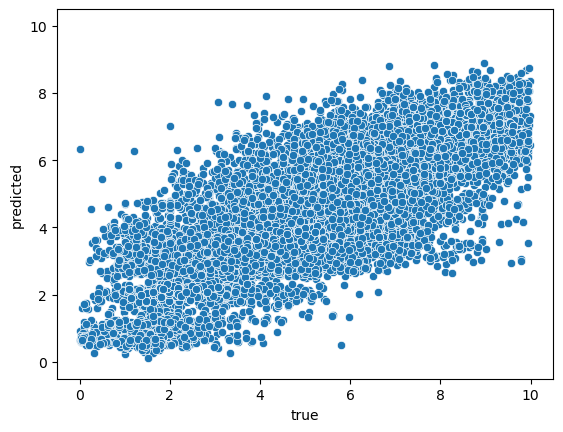

In [1104]:
plots.plot_scatter(true, predicted, 'true', 'predicted')

In [1105]:
predicted

array([4.25227737, 2.8248837 , 3.55021358, ..., 2.23441672, 2.17941999,
       2.17941999])

In [1106]:
result_df = loss.get_res_by_location(df)

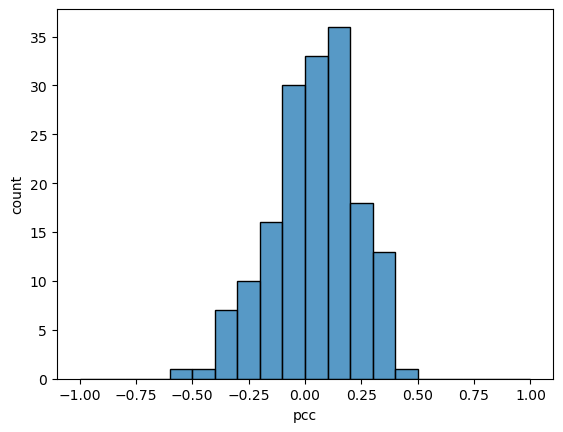

In [1107]:
plots.plot_histogram(result_df['pcc'].to_numpy(), xlabel='pcc', ylabel='count')

In [1108]:
np.sum((result_df['pcc'] > 0) & (result_df['pcc'] <= 0.3))

87

In [1109]:
np.sum(result_df['pcc'] > 0.3)

14

In [1110]:
np.sum(result_df['pcc'] < 0)

65

### Result by trial

In [1111]:
result_df = loss.get_res_by_trial(df)

In [1112]:
np.sum(result_df['pcc'] < 0)

0

In [1113]:
np.sum((result_df['pcc'] > 0) & (result_df['pcc'] <= 0.4))

1

In [1114]:
np.sum(result_df['pcc'] > 0.4)

26

In [1115]:
result_df[result_df['pcc'] < 0].head()

,trial,num_geno,pcc


In [1116]:
result_df[(result_df['pcc'] > 0) & (result_df['pcc'] <= 0.4)].head()

,trial,num_geno,pcc
16,51IBWSN,147,0.242619


## Unique Env

In [1117]:
test_loader =  utils.create_dataloader_for_rep_learned_data(config.test_representation_unique_env, config.test_unique_env_data)

In [1118]:
criterion = nn.MSELoss()
test_loss, true, predicted = evaluator.evaluate_step_by_avg(test_loader, model, criterion)

In [1119]:
pcc = loss.calculate_perf_measure(true, predicted)
spearman, pval = spearmanr(true, predicted)
print('pcc: ', pcc)
print('spearman: ', spearman)

pcc:  0.5093103925005923
spearman:  0.5017438588398253


In [1120]:
df = pd.DataFrame({
    'Loc_no': test_loader.dataset.locations,
    'trial': test_loader.dataset.trials,
    'Value': test_loader.dataset.target,
    'predicted': predicted
})

In [1121]:
result_df = loss.get_res_by_location(df)

In [1122]:
np.sum(result_df['pcc'] < 0)

64

In [1123]:
np.sum((result_df['pcc'] > 0) & (result_df['pcc'] <= 0.3))

151

In [1124]:
np.sum(result_df['pcc'] > 0.3)

30

### Result by trial

In [1125]:
result_df = loss.get_res_by_trial(df)

In [1126]:
np.sum(result_df['pcc'] < 0)

0

In [1127]:
np.sum((result_df['pcc'] > 0) & (result_df['pcc'] <= 0.4))

1

In [1128]:
np.sum(result_df['pcc'] > 0.4)

5

In [1129]:
df.shape

(20400, 4)

In [1130]:
result_df[result_df['pcc'] < 0].head()

,trial,num_geno,pcc


In [1131]:
result_df[(result_df['pcc'] > 0) & (result_df['pcc'] <= 0.4)].head()

,trial,num_geno,pcc
2,36IBWSN,2881,0.371668
